In [61]:
import pandas as pd

df = pd.read_csv('//content/drive/MyDrive/Praktikum ML/Praktikum 6/Data/earthquake_data_tsunami.csv')
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [56]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [67]:
df.isnull().sum()

,0
magnitude,0
cdi,0
mmi,0
sig,0
nst,0
dmin,0
gap,0
depth,0
latitude,0
longitude,0


In [63]:
print(df.columns)

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')


In [68]:
df["tsunami"].unique()

array([1, 0])

In [69]:
df["tsunami"].value_counts()

,count
tsunami,
0,478
1,304


In [71]:
x = df[['magnitude', 'depth', 'latitude']]

# Kolom target tetap:
y = df['tsunami']

In [72]:
x.head()

,magnitude,depth,latitude
0,7.0,14.000,-9.7963
1,6.9,25.000,-4.9559
2,7.0,579.000,-20.0508
3,7.3,37.000,-19.2918
4,6.6,624.464,-25.5948


In [73]:
y.head()

,tsunami
0,1
1,0
2,1
3,1
4,1


In [80]:
import pandas as pd
# Contoh: membaca dataset Iris
df = pd.read_csv('/content/drive/MyDrive/Praktikum ML/Praktikum 6/Data/earthquake_data_tsunami.csv')

# Menentukan fitur dan label
x = df[['magnitude', 'depth', 'latitude']]
y = df['tsunami']

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Perhatikan, Anda menggunakan 'x' dan 'y' kecil di sini.

# Membuat model SVM dengan kernel linear
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [82]:
y_pred = model.predict(X_test)

# Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 57.96%

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.58      1.00      0.73        91
           1       0.00      0.00      0.00        66

    accuracy                           0.58       157
   macro avg       0.29      0.50      0.37       157
weighted avg       0.34      0.58      0.43       157



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Confusion Matrix:
 [[91  0]
 [66  0]]


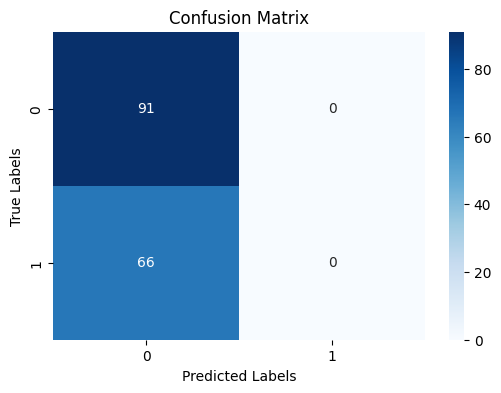

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Jika kamu tahu nama kelas (opsional, agar lebih informatif)
# misalnya: class_names = ['Negatif', 'Positif']
# maka tambahkan ke heatmap di bagian "xticklabels" dan "yticklabels"

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

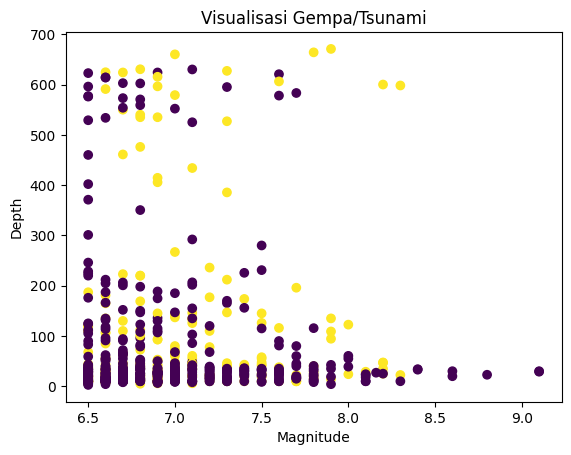

In [85]:
import matplotlib.pyplot as plt

plt.scatter(df['magnitude'], df['depth'], c=df['tsunami'])
plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.title('Visualisasi Gempa/Tsunami')
plt.show()

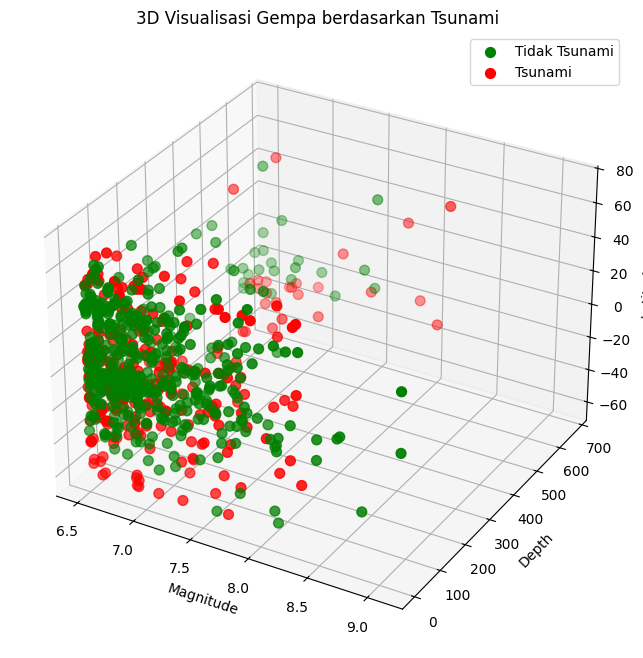

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Kolom Fitur dan Target yang Digunakan ---
# X: 'magnitude', 'depth', 'latitude'
# y: 'tsunami' (0 = Tidak Tsunami, 1 = Tsunami)

# 1. Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna dan Label untuk tiap kelas Tsunami
colors = ['g', 'r']
# Asumsi 0 adalah 'Tidak Tsunami' (hijau) dan 1 adalah 'Tsunami' (merah)
labels = ['Tidak Tsunami', 'Tsunami']

# Plot tiap kelas dengan warna berbeda
for i, status in enumerate(labels):
    # Buat subset data berdasarkan nilai 'tsunami' (0 atau 1)
    subset = df[df['tsunami'] == i]

    ax.scatter(
        # Menggunakan kolom fitur Gempa/Tsunami
        subset['magnitude'],
        subset['depth'],
        subset['latitude'],
        color=colors[i],
        label=status,
        s=50
    )

# Mengganti label sumbu agar sesuai dengan data Gempa/Tsunami
ax.set_xlabel('Magnitude')
ax.set_ylabel('Depth')
ax.set_zlabel('Latitude')
ax.set_title('3D Visualisasi Gempa berdasarkan Tsunami')
ax.legend()
plt.show()